鈴木讓「統計的機械学習の数理 with Python 100問」(共立出版)

# 第1章 線形回帰

## 1.1 最小二乗法

In [1]:
! pip install japanize_matplotlib

最初の部分：ライブラリのインポートと基本設定

In [2]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
# import japanize_matplotlib  # matplotlibの日本語化
from scipy import stats
from numpy.random import randn
# Jupyter Notebookでのグラフ表示設定
%matplotlib inline

In [3]:
# Anacondaの場合は下記( import japanize_matplotlib はコメントアウト)
import matplotlib
from matplotlib import font_manager
matplotlib.rc("font", family="BIZ UDGothic")

最小二乗法の定義と人工データの生成

In [4]:
def min_sq(x, y):
    """最小二乗法の切片と傾きを求める関数"""
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(x - x_bar, y - y_bar) / np.linalg.norm(x - x_bar) ** 2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [5]:
# 人工データの生成
N = 100
a = randn(1) + 2  # 傾き
b = randn(1)  # 切片
x = randn(N)
y = a * x + b + randn(N)

# 回帰係数と切片の計算
a1, b1 = min_sq(x, y)
xx = x - np.mean(x)  # 中心化
yy = y - np.mean(y)  # 中心化
a2, b2 = min_sq(xx, yy)

グラフのプロット

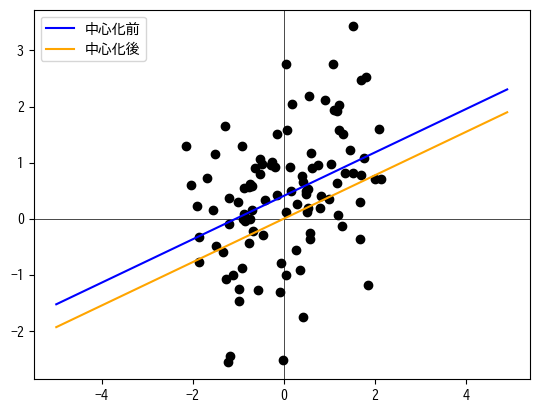

In [6]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq * a1 + b1
yy_pre = x_seq * a2 + b2

plt.scatter(x, y, c="black")
plt.axhline(y=0, c="black", linewidth=0.5)
plt.axvline(x=0, c="black", linewidth=0.5)
plt.plot(x_seq, y_pre, c="blue", label="中心化前")
plt.plot(x_seq, yy_pre, c="orange", label="中心化後")
plt.legend(loc="upper left")
plt.show()

## 1.2 重回帰

In [7]:
n = 100
p = 2
beta = np.array([1, 2, 3])
x = randn(n, 2)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + randn(n)
X = np.insert(x, 0, 1, axis=1)  # 左側にすべて1の列を追加

# betaを推定する
np.linalg.inv(X.T @ X) @ X.T @ y

array([1.02930198, 1.71251   , 2.85962006])

## 1.4 RSSの分布

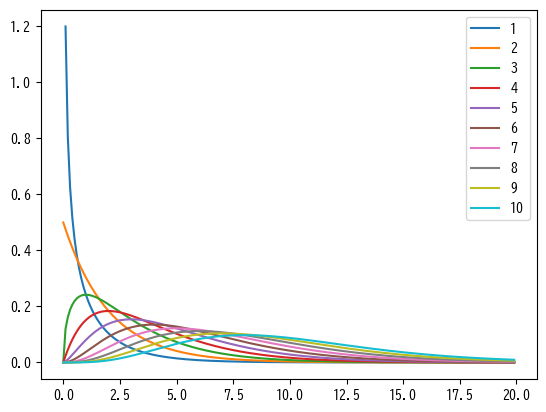

In [8]:
x = np.arange(0, 20, 0.1)
for i in range(1, 11):
    plt.plot(x, stats.chi2.pdf(x, i), label=f'{i}')
plt.legend(loc='upper right')
plt.show()

## 1.5  $\beta_j=0$の仮説検定

Text(0.5, 1.0, 't分布が自由度とともにどのように変化するか')

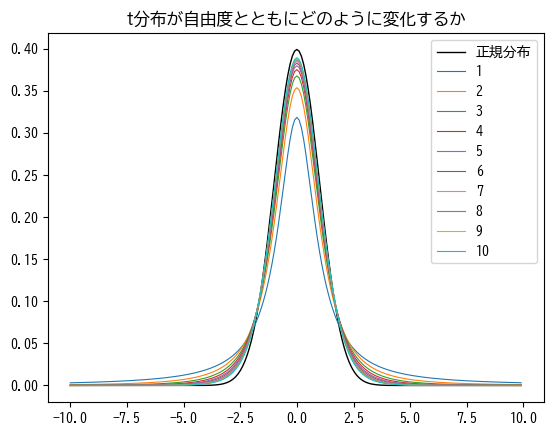

In [9]:
x=np.arange(-10,10,0.1)
plt.plot(x,stats.norm.pdf(x,0,1),label="正規分布",c="black",linewidth=1)
for i in range(1,11):
    plt.plot(x,stats.t.pdf(x, i),label='{}'.format(i),linewidth=0.8)
plt.legend(loc='upper right')
plt.title("t分布が自由度とともにどのように変化するか")

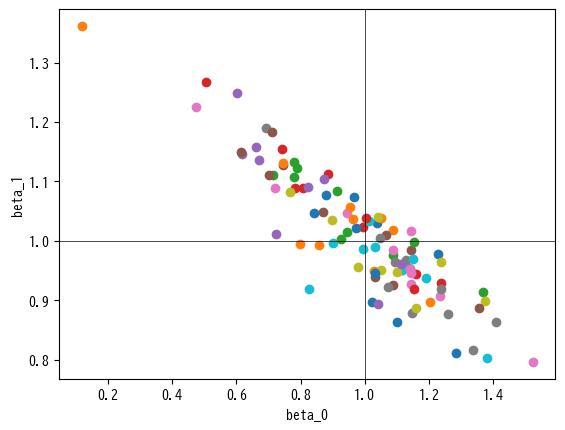

In [10]:
N = 100
p = 1
iter_num = 100
for i in range(iter_num):
    x = randn(N) + 2
    e = randn(N)
    y = x + 1 + e
    b_1, b_0 = min_sq(x, y)
    plt.scatter(b_0, b_1)

plt.axhline(y=1.0, c="black", linewidth=0.5)
plt.axvline(x=1.0, c="black", linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')
plt.show()

In [11]:
N = 100
x = randn(N)
y = randn(N)
beta_1, beta_0 = min_sq(x, y)

RSS = np.linalg.norm(y - beta_0 - beta_1 * x) ** 2
RSE = np.sqrt(RSS / (N - 2))
B_0 = (np.linalg.norm(x) ** 2 / N) / np.linalg.norm(x - np.mean(x)) ** 2
B_1 = 1 / np.linalg.norm(x - np.mean(x)) ** 2

se_0 = RSE * np.sqrt(B_0)
se_1 = RSE * np.sqrt(B_1)

t_0 = beta_0 / se_0
t_1 = beta_1 / se_1

p_0 = 2 * (1 - stats.t.cdf(np.abs(t_0), N - 2))
p_1 = 2 * (1 - stats.t.cdf(np.abs(t_1), N - 2))

In [12]:
print(f"切片 beta_0: {beta_0}, 標準誤差: {se_0}, t値: {t_0}, p値: {p_0}")

切片 beta_0: 0.050925494634884855, 標準誤差: 0.0880450921638307, t値: 0.5784024229326125, p値: 0.5643193242907578


In [13]:
print(f"回帰係数 beta_1: {beta_1}, 標準誤差: {se_1}, t値: {t_1}, p値: {p_1}")

回帰係数 beta_1: 0.0724640362518541, 標準誤差: 0.1023476728624368, t値: 0.7080184065274389, p値: 0.4806143989655267


線形回帰モデルのフィッティング

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# sklearnで線形回帰モデルをフィッティング
reg = LinearRegression()
x = x.reshape(-1, 1)  # sklearnでは配列のサイズを明示する必要がある
y = y.reshape(-1, 1)  # 片方の次元を設定し, もう片方を-1にすると自動で調整される
reg.fit(x, y)

LinearRegression()

In [16]:
# 回帰係数 beta_1, 切片 beta_0 を表示
print("回帰係数 beta_1:", reg.coef_)
print("切片 beta_0:", reg.intercept_)

回帰係数 beta_1: [[0.07246404]]
切片 beta_0: [0.05092549]


統計モデルの構築と評価

In [17]:
import statsmodels.api as sm

In [18]:
X = np.insert(x, 0, 1, axis=1)  # 定数項（切片）を含むデザインマトリックス
model = sm.OLS(y, X)  # OLSモデルの構築
res = model.fit()  # モデルのフィッティング

# モデルのサマリーを表示
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5013
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.481
Time:                        14:43:02   Log-Likelihood:                -126.43
No. Observations:                 100   AIC:                             256.9
Df Residuals:                      98   BIC:                             262.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0509      0.088      0.578      0.5

βの推定値の分布の評価

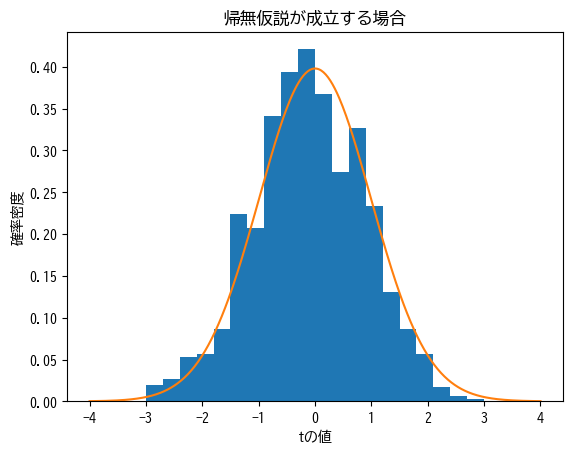

In [19]:
N = 100
r = 1000
T = []

for i in range(r):
    x = randn(N)
    y = randn(N)
    beta_1, beta_0 = min_sq(x, y)
    pre_y = beta_0 + beta_1 * x  # yの予測値
    RSS = np.linalg.norm(y - pre_y) ** 2
    RSE = np.sqrt(RSS / (N - 2))
    B_1 = 1 / np.linalg.norm(x - np.mean(x)) ** 2
    se_1 = RSE * np.sqrt(B_1)
    T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.t.pdf(x, N - 2))
plt.title("帰無仮説が成立する場合")
plt.xlabel('tの値')
plt.ylabel('確率密度')
plt.show()

## 1.6 決定係数と共線形性の検出

In [20]:
def R2(x, y):
    n = x.shape[0]
    xx = np.insert(x, 0, 1, axis=1)
    beta = np.linalg.inv(xx.T @ xx) @ xx.T @ y
    y_hat = np.dot(xx, beta)
    y_bar = np.mean(y)
    RSS = np.linalg.norm(y - y_hat) ** 2
    TSS = np.linalg.norm(y - y_bar) ** 2
    return 1 - RSS / TSS

In [21]:
# 決定係数の計算と相関係数の2乗との比較
N = 100
x = randn(N, 1)
y = randn(N)
print("決定係数 R^2:", R2(x, y))

決定係数 R^2: 0.003952016632365218


In [22]:
xx = x.reshape(N)
print("相関係数の2乗:", np.corrcoef(xx, y)[0, 1] ** 2)

相関係数の2乗: 0.003952016632365273


In [23]:
x = np.loadtxt("boston.txt", delimiter="\t")
x.shape

(506, 14)

In [24]:
def VIF(x):
    p = x.shape[1]
    values = []
    for j in range(p):
        S = list(set(range(p)) - {j})
        X = x[:, S]
        y = x[:, j]
        values.append(1 / (1 - R2(X, y.reshape(-1, 1))))
    return values

In [25]:
VIF(x)

[1.831536683713473,
 2.352185889014948,
 3.9925031533175352,
 1.0952226687688214,
 4.58692024225555,
 2.2603743566681316,
 3.1008428195459823,
 4.3960072515073945,
 7.808198432681462,
 9.205542091810146,
 1.9930156565532824,
 1.3814629538442613,
 3.5815848036702103,
 3.8556842688338224]

## 1.7 信頼区間と予測区間

In [26]:
N = 100; p = 1
X = np.random.randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = np.array([1, 1])
epsilon = np.random.randn(N)
y = X @ beta + epsilon

In [27]:

# 関数f(x), g(x)を定義
U = np.linalg.inv(X.T @ X)
beta_hat = U @ X.T @ y
RSS = np.linalg.norm(y - X @ beta_hat) ** 2
RSE = np.sqrt(RSS / (N - p - 1))
alpha = 0.05

In [28]:
def f(x, a):  # a=0なら信頼区間・a=1なら予測区間
    x = np.array([1, x])
    # stats.t.ppf(0.975, df=N-p-1) # 累積確率が1-alpha/2となる点
    range_ = stats.t.ppf(0.975, df=N - p - 1) * RSE * np.sqrt(a + x @ U @ x.T)
    lower = x @ beta_hat - range_
    upper = x @ beta_hat + range_
    return ([lower, upper])

In [29]:
# 例
print(stats.t.ppf(0.975, df=N - p - 1))  # 確率pに対応する点

1.984467454426692


In [30]:
x_seq = np.arange(-10, 10, 0.1)
# 信頼区間
lower_seq1 = []; upper_seq1 = []
for i in range(len(x_seq)):
    lower_seq1.append(f(x_seq[i], 0)[0])
    upper_seq1.append(f(x_seq[i], 0)[1])
# 予測区間
lower_seq2 = []; upper_seq2 = []
for i in range(len(x_seq)):
    lower_seq2.append(f(x_seq[i], 1)[0])
    upper_seq2.append(f(x_seq[i], 1)[1])

yy = beta_hat[0] + beta_hat[1] * x_seq

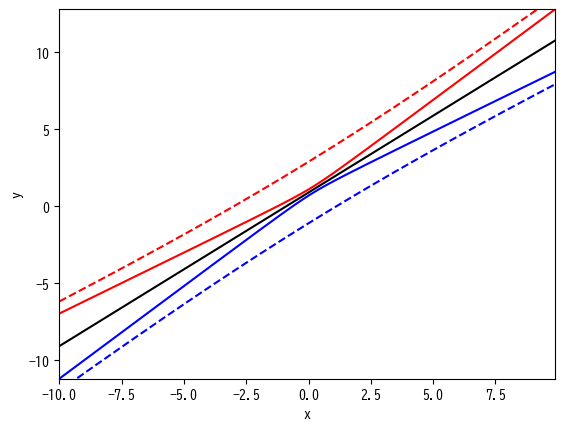

In [31]:
plt.xlim(np.min(x_seq), np.max(x_seq))
plt.ylim(np.min(lower_seq1), np.max(upper_seq1))
plt.plot(x_seq, yy, c="black")
plt.plot(x_seq, lower_seq1, c="blue")
plt.plot(x_seq, upper_seq1, c="red")
plt.plot(x_seq, lower_seq2, c="blue", linestyle="dashed")
plt.plot(x_seq, upper_seq2, c="red", linestyle="dashed")
plt.xlabel("x")
plt.ylabel("y")
plt.show()